In [1]:
# BASIC HEADERS

import yfinance as yf

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import sklearn

import seaborn as sns

import sklearn.model_selection as model_selection
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [2]:
# Ignore this, doesn't give Adjusted close
aapl = yf.Ticker("AAPL")
aapl_dataset = aapl.history(start='2010-01-01', end = '2021-12-01')

In [3]:
aapl_dataset = yf.download("AAPL",'2010-01-01', '2021-12-01')

[*********************100%***********************]  1 of 1 completed


In [4]:
aapl_dataset

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2010-01-04,7.622500,7.660714,7.585000,7.643214,6.553025,493729600
2010-01-05,7.664286,7.699643,7.616071,7.656429,6.564353,601904800
2010-01-06,7.656429,7.686786,7.526786,7.534643,6.459941,552160000
2010-01-07,7.562500,7.571429,7.466071,7.520714,6.447997,477131200
2010-01-08,7.510714,7.571429,7.466429,7.570714,6.490867,447610800
...,...,...,...,...,...,...
2021-11-23,161.119995,161.800003,159.059998,161.410004,161.410004,96041900
2021-11-24,160.750000,162.139999,159.639999,161.940002,161.940002,69463600
2021-11-26,159.570007,160.449997,156.360001,156.809998,156.809998,76959800


In [5]:
new_aapl_dataset = pd.DataFrame()
new_aapl_dataset['Close'] = aapl_dataset['Close']
# new_aapl_dataset['Shift_10'] = aapl_dataset['Close'].shift(10)
# new_aapl_dataset['SMA_10_shift_10'] = aapl_dataset['Close'].rolling(10).mean().shift(10)
# new_aapl_dataset['Shift_20'] = aapl_dataset['Close'].shift(20)
# new_aapl_dataset['SMA_20_shift_10'] = 

for i in [10,15,20,25,30]:
    shift_label = 'Shift_%d' % (np.int(i))
    new_aapl_dataset[shift_label] = aapl_dataset['Close'].shift(np.int(i))
    open_label = 'Open_Shift_%d' % (np.int(i))
    new_aapl_dataset[open_label] = aapl_dataset['Open'].shift(np.int(i))
    volume_label = 'Volume_shift_%d' % (np.int(i))
    new_aapl_dataset[volume_label] = aapl_dataset['Volume'].shift(np.int(i))
    high_label = 'High_Shift_%d' % (np.int(i))
    new_aapl_dataset[high_label] = aapl_dataset['High'].shift(np.int(i))
    low_label = 'Low_Shift_%d' % (np.int(i))
    new_aapl_dataset[low_label] = aapl_dataset['Low'].shift(np.int(i))
    for j in [10,15,20,25,30]:
        SMA_label = 'SMA_%d_shift_%d' % (np.int(j),np.int(i))
        new_aapl_dataset[SMA_label] = aapl_dataset['Close'].rolling(np.int(j)).mean().shift(np.int(i))
aapl_dataset['Date'] = pd.to_datetime(aapl_dataset.index)
new_aapl_dataset['Year'] = aapl_dataset['Date'].dt.year
new_aapl_dataset['Month'] = aapl_dataset['Date'].dt.month
new_aapl_dataset['Day'] = aapl_dataset['Date'].dt.day
new_aapl_dataset['Day_of_week'] = aapl_dataset['Date'].dt.dayofweek
new_aapl_dataset['Day_of_year'] = aapl_dataset['Date'].dt.dayofyear
new_aapl_dataset['is_month_start'] = aapl_dataset['Date'].dt.is_month_start
new_aapl_dataset['is_month_end'] = aapl_dataset['Date'].dt.is_month_end
new_aapl_dataset['is_quarter_start'] = aapl_dataset['Date'].dt.is_quarter_start
new_aapl_dataset['is_quarter_end'] = aapl_dataset['Date'].dt.is_quarter_end
new_aapl_dataset['is_quarter_start'] = aapl_dataset['Date'].dt.is_quarter_start
new_aapl_dataset['is_quarter_start'] = aapl_dataset['Date'].dt.is_quarter_start
new_aapl_dataset['is_quarter_start'] = aapl_dataset['Date'].dt.is_quarter_start
new_aapl_dataset

<ipython-input-5-5c0e7f9e8135>:9: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  shift_label = 'Shift_%d' % (np.int(i))
<ipython-input-5-5c0e7f9e8135>:10: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; fo

,Close,Shift_10,Open_Shift_10,Volume_shift_10,High_Shift_10,Low_Shift_10,SMA_10_shift_10,SMA_15_shift_10,SMA_20_shift_10,SMA_25_shift_10,...,SMA_30_shift_30,Year,Month,Day,Day_of_week,Day_of_year,is_month_start,is_month_end,is_quarter_start,is_quarter_end
Date,,,,,,,,,,,,,,,,,,,,,
2010-01-04,7.643214,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2010,1,4,0,4,False,False,False,False
2010-01-05,7.656429,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2010,1,5,1,5,False,False,False,False
2010-01-06,7.534643,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2010,1,6,2,6,False,False,False,False
2010-01-07,7.520714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2010,1,7,3,7,False,False,False,False
2010-01-08,7.570714,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2010,1,8,4,8,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-11-23,161.410004,150.809998,150.199997,56787900.0,151.429993,150.059998,150.518004,150.038003,148.769501,147.516000,...,146.722332,2021,11,23,1,327,False,False,False,False
2021-11-24,161.940002,147.919998,150.020004,65187100.0,150.130005,147.850006,150.425003,149.948669,149.120001,147.752800,...,146.358332,2021,11,24,2,328,False,False,False,False
2021-11-26,156.809998,147.869995,148.960007,41000000.0,149.429993,147.679993,149.955002,149.841336,149.325501,147.936000,...,146.066666,2021,11,26,4,330,False,False,False,False


In [6]:
new_aapl_dataset = new_aapl_dataset.dropna()
print(new_aapl_dataset.describe)
# X_train = np.array([new_aapl_dataset['Shift_10'][:-10].to_numpy(),new_aapl_dataset['SMA_10_shift_10'][:-10].to_numpy()]).T
X_train = np.array(new_aapl_dataset.drop('Close', axis=1)[:-100])
# X_train = new_aapl_dataset['SMA_10_shift_10'][:-10].to_numpy()
# X_test = np.array(new_aapl_dataset['Shift_10','SMA_10_shift_10'][-10:])
# X_test = np.array([new_aapl_dataset['Shift_10'][-10:].to_numpy(),new_aapl_dataset['SMA_10_shift_10'][-10:].to_numpy()]).T
X_test = np.array(new_aapl_dataset.drop('Close',axis=1)[-100:])
y_train = new_aapl_dataset['Close'][:-100].to_numpy()
y_test = np.array(new_aapl_dataset['Close'][-100:])
# X_train = np.reshape(X_train, (X_train.shape[0],1))
# X_test = np.asarray(X_test).reshape(-1,1)
# X_test = np.reshape(X_test, (X_test.shape[0],1))
X_test.shape[0]+X_train.shape[0]


<bound method NDFrame.describe of                  Close    Shift_10  Open_Shift_10  Volume_shift_10  \
Date                                                                 
2010-03-30    8.423214    8.016071       8.006429      446908000.0   
2010-03-31    8.392857    8.004286       8.032143      450956800.0   
2010-04-01    8.427500    8.023214       8.003571      342109600.0   
2010-04-05    8.517500    7.937500       8.028214      559445600.0   
2010-04-06    8.555000    8.026786       7.873929      456419600.0   
...                ...         ...            ...              ...   
2021-11-23  161.410004  150.809998     150.199997       56787900.0   
2021-11-24  161.940002  147.919998     150.020004       65187100.0   
2021-11-26  156.809998  147.869995     148.960007       41000000.0   
2021-11-29  160.240005  149.990005     148.429993       63632600.0   
2021-11-30  165.300003  150.000000     150.369995       59222800.0   

            High_Shift_10  Low_Shift_10  SMA_10_shift_1

2940

LINEAR REGRESSION

In [7]:
# print(X_train[:10])
print(y_train.shape)
lr = LinearRegression()
lr.fit(X_train,y_train)
train_score = lr.score(X_train,y_train)
print(f"Train score = {train_score}")
y_pred = lr.predict(X_test)
test_score = lr.score(X_test,y_test)
print(f"Test score = {test_score}")
print(f"Predicted value = {lr.predict(X_test)}")
print(f"Y_train = {y_test}")


(2840,)
Train score = 0.9918806446830986
Test score = -0.3233400738117722
Predicted value = [137.48565608 138.27673477 138.99176263 139.70186241 139.01451172
 141.22624262 143.41495633 145.36439155 143.31260863 145.84593638
 144.7844584  146.9057803  150.51420485 148.99452185 147.58601855
 144.83186418 148.88400611 147.92038744 149.83156131 151.2131555
 151.04930077 147.46511401 143.79534513 147.15764174 146.30467361
 145.86176049 147.63059832 147.92322993 148.93221149 147.80162846
 147.96717814 148.14823766 148.71662232 149.94364335 151.73679769
 150.1752632  152.53449354 146.54823488 147.88051476 149.22053298
 150.61308419 153.0106827  150.50161009 150.398009   149.45533303
 152.80068783 154.19395148 156.99627133 156.42417143 156.89084745
 159.0115193  156.59772563 157.92053506 148.40262735 151.3678279
 149.54169136 150.11937423 152.45655161 148.30186045 142.95356502
 145.5266953  146.4030647  147.80599464 150.84961235 145.51402855
 143.38994981 143.32734144 141.2363199  141.70124866

One step behind

Train score = 0.9991739057429632
Predicted value = [160.43413352]
Y_test = 165.3000030517578



In [8]:
pred_dataframe = pd.DataFrame()
pred_dataframe['Y_test'] = y_test
pred_dataframe['Pred'] = y_pred
pred_dataframe.index = new_aapl_dataset.index[-100:]
pred_dataframe

,Y_test,Pred
Date,,
2021-07-12,144.500000,137.485656
2021-07-13,145.639999,138.276735
2021-07-14,149.149994,138.991763
2021-07-15,148.479996,139.701862
2021-07-16,146.389999,139.014512
...,...,...
2021-11-23,161.410004,154.464409
2021-11-24,161.940002,148.573462
2021-11-26,156.809998,149.408319


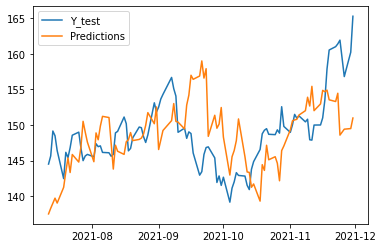

In [9]:
plt.plot(pred_dataframe['Y_test'],label='Y_test')
plt.plot(pred_dataframe['Pred'],label='Predictions')
plt.legend()
plt.show()


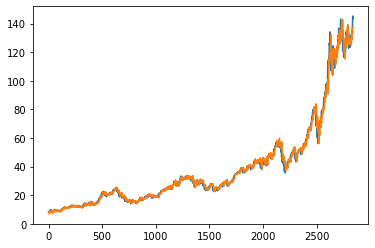

In [10]:
plt.plot(y_train)
plt.plot(lr.predict(X_train))

RIDGE REGRESSION


In [11]:
from sklearn.linear_model import Ridge

alphas = [5, 1, 0.1, 0.01, 0.001]
scores = []
models = []
pred_dataframe = pd.DataFrame()
pred_dataframe['Y_test'] = y_test
pred_dataframe.index = new_aapl_dataset.index[-100:]
# pred_dataframe
for alpha in alphas:
    ridge = Ridge(alpha=alpha, max_iter=10e5)
    ridge.fit(X_train, y_train)
    models.append(ridge)
    y_pred = ridge.predict(X_test)
    val_score = mean_squared_error(y_test,y_pred)
    scores.append(val_score)
    label = "Pred_%f" %(alpha)
    pred_dataframe[label] = y_pred

final= np.hstack([np.reshape(alphas,(-1,1)) , np.reshape(scores, (-1,1)) ])


print(final)
# markers_list = ['*', 'd', 'v', 'o', 'x']
# color_list = ['red','blue','black','green','navy']
# plt.rcParams["figure.figsize"] = (15,5)
# for i in range(len(alphas)):
#     plt.plot(range(10), models[i].coef_, alpha=0.7, marker=markers_list[i], markersize=5, color=color_list[i], label=r'Ridge; $\alpha = $'+str(alphas[i]),zorder=7)
# plt.plot(range(10),lr.coef_,alpha=0.7,marker='*',markersize=5,color='orange',label='Linear Regression',zorder=2)
# plt.xlabel('Coefficient Index',fontsize=11)
# plt.ylabel('Coefficient Value',fontsize=11)
# plt.title(r"Coefficient sizes with different $\alpha$")
# plt.legend(fontsize=10,loc=4)
# plt.tight_layout()
# plt.show()

[[5.00000000e+00 3.17130560e+01]
 [1.00000000e+00 3.18504074e+01]
 [1.00000000e-01 3.18864517e+01]
 [1.00000000e-02 3.18903812e+01]
 [1.00000000e-03 3.18907795e+01]]


C:\Users\shrey\AppData\Local\Programs\PythonCodingPack\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=3.71283e-21): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\shrey\AppData\Local\Programs\PythonCodingPack\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=8.26194e-22): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\shrey\AppData\Local\Programs\PythonCodingPack\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.51261e-23): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\shrey\AppData\Local\Programs\PythonCodingPack\lib\site-packages\sklearn\linear_model\_ridge.py:147: LinAlgWarning: Ill-conditioned matrix (rcond=9.51314e-24): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True,
C:\Users\shrey\AppData\Local\Programs\Python

In [12]:
# pred_dataframe = pd.DataFrame()
# pred_dataframe['Y_test'] = y_test
# pred_dataframe['Pred'] = y_pred
# pred_dataframe.index = new_aapl_dataset.index[-10:]
pred_dataframe

,Y_test,Pred_5.000000,Pred_1.000000,Pred_0.100000,Pred_0.010000,Pred_0.001000
Date,,,,,,
2021-07-12,144.500000,137.469377,137.492106,137.487204,137.485825,137.485673
2021-07-13,145.639999,138.318741,138.302136,138.280784,138.277164,138.276777
2021-07-14,149.149994,139.020569,139.014017,138.995487,138.992159,138.991802
2021-07-15,148.479996,139.755406,139.724942,139.705246,139.702218,139.701898
2021-07-16,146.389999,139.096470,139.048884,139.019524,139.015038,139.014564
...,...,...,...,...,...,...
2021-11-23,161.410004,154.363874,154.429005,154.459547,154.463900,154.464357
2021-11-24,161.940002,148.567232,148.552987,148.569671,148.573054,148.573421
2021-11-26,156.809998,149.405816,149.392118,149.405237,149.407986,149.408285


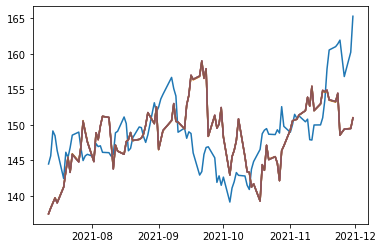

In [13]:
plt.plot(pred_dataframe['Y_test'])
for alpha in alphas:
    label = "Pred_%f" %(alpha)
    plt.plot(pred_dataframe[label])


RANDOM FOREST REGRESSOR

In [14]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import accuracy_score
errors = np.zeros((5,2))
errors[:,0] = [5,10,15,20,50]
for i in range(5):
    print(f"------- N_Leaves = {errors[i,0]} --------\n")
    rfr = RandomForestRegressor(n_estimators=np.int(errors[i,0]),random_state=0,criterion="mae")

    rfr.fit(X_train,y_train)

    train_score = rfr.score(X_train,y_train)
    print(f"Train score = {train_score}")
    y_pred = rfr.predict(X_test)
    test_score = rfr.score(X_test,y_test)
    print(f"Test score = {test_score}")
    print(f"Predicted value = {rfr.predict(X_train)[-10:]}")
    print(f"Y_train = {y_train[-10:]}")
    errors[i,1] = test_score
    print("--------------------------------\n")
    



------- N_Leaves = 5.0 --------



<ipython-input-14-b47c65d8cdff>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rfr = RandomForestRegressor(n_estimators=np.int(errors[i,0]),random_state=0,criterion="mae")


Train score = 0.9995586245982601
Test score = -30.43418748296457
Predicted value = [133.06800232 134.28999939 136.02000122 136.83400574 137.27000427
 138.36000366 140.54200439 144.30400696 143.52800598 144.62800293]
Y_train = [133.11000061 134.77999878 136.33000183 136.96000671 137.27000427
 139.96000671 142.02000427 144.57000732 143.24000549 145.11000061]
--------------------------------

------- N_Leaves = 10.0 --------



<ipython-input-14-b47c65d8cdff>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rfr = RandomForestRegressor(n_estimators=np.int(errors[i,0]),random_state=0,criterion="mae")


Train score = 0.9996901671292179
Test score = -26.281593084511215
Predicted value = [133.29200134 134.52299957 136.02000122 136.89700623 137.55200424
 137.68500443 141.28100433 144.23600616 143.89100494 144.81500244]
Y_train = [133.11000061 134.77999878 136.33000183 136.96000671 137.27000427
 139.96000671 142.02000427 144.57000732 143.24000549 145.11000061]
--------------------------------

------- N_Leaves = 15.0 --------



<ipython-input-14-b47c65d8cdff>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rfr = RandomForestRegressor(n_estimators=np.int(errors[i,0]),random_state=0,criterion="mae")


Train score = 0.9997090637165221
Test score = -25.84778581237573
Predicted value = [133.36266785 134.71866659 135.88800151 136.95533854 138.09133759
 138.58067169 141.52733765 144.08867289 143.77000529 144.6353363 ]
Y_train = [133.11000061 134.77999878 136.33000183 136.96000671 137.27000427
 139.96000671 142.02000427 144.57000732 143.24000549 145.11000061]
--------------------------------

------- N_Leaves = 20.0 --------



<ipython-input-14-b47c65d8cdff>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rfr = RandomForestRegressor(n_estimators=np.int(errors[i,0]),random_state=0,criterion="mae")


Train score = 0.9997398824153144
Test score = -25.94253791690295
Predicted value = [133.40200043 135.17350006 136.28300171 136.8935051  138.1550045
 139.15600548 141.77800446 143.97850647 143.63750534 144.59950256]
Y_train = [133.11000061 134.77999878 136.33000183 136.96000671 137.27000427
 139.96000671 142.02000427 144.57000732 143.24000549 145.11000061]
--------------------------------

------- N_Leaves = 50.0 --------



<ipython-input-14-b47c65d8cdff>:7: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  rfr = RandomForestRegressor(n_estimators=np.int(errors[i,0]),random_state=0,criterion="mae")


Train score = 0.9997952412303557
Test score = -25.008268042410837
Predicted value = [133.41140045 134.86039978 136.47520203 136.69640533 137.62000412
 138.49000534 141.19120453 143.44120636 143.5824054  143.93240234]
Y_train = [133.11000061 134.77999878 136.33000183 136.96000671 137.27000427
 139.96000671 142.02000427 144.57000732 143.24000549 145.11000061]
--------------------------------



In [15]:
pred_dataframe = pd.DataFrame()
pred_dataframe['Y_test'] = y_test
pred_dataframe['Pred'] = y_pred
pred_dataframe.index = new_aapl_dataset.index[-100:]
pred_dataframe

,Y_test,Pred
Date,,
2021-07-12,144.500000,141.578804
2021-07-13,145.639999,140.697803
2021-07-14,149.149994,138.419003
2021-07-15,148.479996,137.556003
2021-07-16,146.389999,135.447402
...,...,...
2021-11-23,161.410004,123.611400
2021-11-24,161.940002,122.794400
2021-11-26,156.809998,122.666200


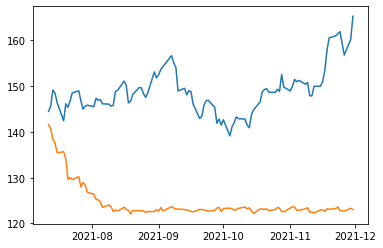

In [16]:
plt.plot(pred_dataframe['Y_test'])
plt.plot(pred_dataframe['Pred'])


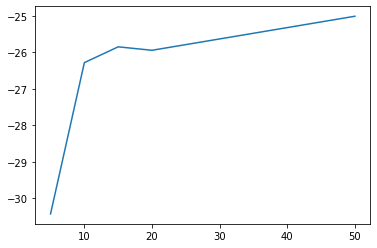

In [17]:
plt.plot(errors[:,0],errors[:,1])

Neural Network

In [18]:
import torch

In [19]:
# https://www.analyticsvidhya.com/blog/2021/08/hands-on-stock-price-time-series-forecasting-using-deep-convolutional-networks/
import torch.nn as nn

# Lagged closing, similar to LSTM

def create_dataset(in_data, days=1):
    X=[]
    Y=[]
    for i in range(len(in_data)-days-1):
        temp_X = in_data[i:i+days,0]
        temp_Y = in_data[i+days,0]

        X.append(temp_X)
        Y.append(temp_Y)
    return np.array(X), np.array(Y).reshape((-1,1))



In [20]:
train_data = new_aapl_dataset['Close'][:-100].to_numpy().reshape((-1,1))
test_data  = new_aapl_dataset['Close'][-100:].to_numpy().reshape((-1,1))

time_interval = 50
X_train, y_train = create_dataset(train_data,time_interval)
X_test, y_test = create_dataset(test_data,time_interval)
# print(y_train.shape)
# print(np.hstack((X_train[:10,-5:],y_train[:10])))
print(X_train)

[[  8.42321396   8.3928566    8.42749977 ...   8.96214294   8.90464306
    8.68571377]
 [  8.3928566    8.42749977   8.51749992 ...   8.90464306   8.68571377
    8.94678593]
 [  8.42749977   8.51749992   8.55500031 ...   8.68571377   8.94678593
    9.05392933]
 ...
 [134.32000732 134.72000122 134.38999939 ... 136.96000671 137.27000427
  139.96000671]
 [134.72000122 134.38999939 133.58000183 ... 137.27000427 139.96000671
  142.02000427]
 [134.38999939 133.58000183 133.47999573 ... 139.96000671 142.02000427
  144.57000732]]


In [21]:
# Convert pandas dataframe to dataloader pytorch dataset class
# train_target = torch.tensor(train['Target'].values.astype(np.float32))
# train = torch.tensor(train.drop('Target', axis = 1).values.astype(np.float32)) 
# train_tensor = data_utils.TensorDataset(train, train_target) 
# train_loader = data_utils.DataLoader(dataset = train_tensor, batch_size = batch_size, shuffle = True)
train_tensor = torch.tensor(X_train)
test_tensor = torch.tensor(X_test)
train_close_tensor = torch.tensor(y_train)
test_close_tensor = torch.tensor(y_test)
train_tensor_dataset = TensorDataset(train_tensor,train_close_tensor)
test_tensor_dataset = TensorDataset(test_tensor,test_close_tensor)
train_loader = DataLoader(train_tensor_dataset,batch_size=25,shuffle=False)
test_loader = DataLoader(test_tensor_dataset,batch_size=25,shuffle=False)

for itr, (x,y) in enumerate(train_loader):
    print('------')
    print(itr)
    print(x)
    print(y)

------
0
tensor([[8.4232, 8.3929, 8.4275,  ..., 8.9621, 8.9046, 8.6857],
        [8.3929, 8.4275, 8.5175,  ..., 8.9046, 8.6857, 8.9468],
        [8.4275, 8.5175, 8.5550,  ..., 8.6857, 8.9468, 9.0539],
        ...,
        [9.3246, 9.5125, 9.2386,  ..., 9.2175, 9.2721, 9.1889],
        [9.5125, 9.2386, 9.1425,  ..., 9.2721, 9.1889, 8.9929],
        [9.2386, 9.1425, 8.7946,  ..., 9.1889, 8.9929, 9.0261]],
       dtype=torch.float64)
tensor([[8.9468],
        [9.0539],
        [9.0814],
        [9.2746],
        [9.5446],
        [9.7096],
        [9.7882],
        [9.6489],
        [9.7804],
        [9.6775],
        [9.6071],
        [9.5250],
        [9.5821],
        [9.1489],
        [8.9832],
        [8.8743],
        [8.8193],
        [8.8796],
        [9.2382],
        [9.2175],
        [9.2721],
        [9.1889],
        [8.9929],
        [9.0261],
        [8.9804]], dtype=torch.float64)
------
1
tensor([[9.1425, 8.7946, 8.4236,  ..., 8.9929, 9.0261, 8.9804],
        [8.7946, 8.4

In [22]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'
print('Using {} device'.format(device))

class ANN(nn.Module):
    def __init__(self):
        super(ANN,self).__init__()
        self.linear1 = nn.Linear(in_features=50, out_features= 100, bias=True)
        self.linear2 = nn.Linear(in_features=100,out_features=100,bias=True)
        self.linear3 = nn.Linear(in_features=100, out_features=10, bias=True)
        self.linear4 = nn.Linear(in_features=10, out_features=1, bias=True)
        self.relu = nn.ReLU()

    def forward(self,x):
        # x = torch.flatten(x,1)
        x = self.linear1(x)
        x = self.relu(x)
        x = self.linear2(x)
        x = self.relu(x)
        x = self.linear3(x)
        x = self.relu(x)
        x = self.linear4(x)
        # x = self.relu(x)
        return x

Using cpu device


In [23]:
# from keras.models import Sequential
# from keras.layers import Dense

# ann_model = Sequential()
# ann_model.add(Dense(100, input_dim=50, activation='relu'))
# ann_model.add(Dense(100, activation='relu'))
# ann_model.add(Dense(50, activation='relu'))
# ann_model.add(Dense(1, activation='relu'))

# ann_model.compile(loss='mse', optimizer='adam', metrics=['accuracy'])

# ann_model.fit(X_train, y_train, epochs=150, batch_size=64)

# _, accuracy = ann_model.evaluate(X_test, y_test)
# print('Accuracy: %.2f' % (accuracy*100))


In [24]:
import torch.optim as optim

nn_model = ANN()
criterion = nn.MSELoss()
optimizer = optim.Adam(nn_model.parameters(), lr = 1e-3)

overall_step = 0

epochs = 100

train_loss = []
val_loss = []

for epoch in range(epochs):  # loop over the dataset multiple times
    running_loss = 0
    acc = 0
    total = 0
    num_batches = 0
    nn_model.train()
    for _,(X,y) in enumerate(train_loader):
                
        optimizer.zero_grad()
        X = X.float()
        # print(X)
        y_pred = nn_model.forward(X)
        # print(y_pred)
        y = y.float()
        loss = criterion(y_pred, y)
        running_loss += loss.item()
        #Backprop
        loss.backward()
        optimizer.step()
        num_batches += 1
    
    running_loss = running_loss / num_batches
    train_loss.append(running_loss)
    
    running_val_loss = 0 
    num_batches = 0
    nn_model.eval()
    for _,(X,y) in enumerate(test_loader):
        X = X.float()
        y_pred = nn_model(X).to(device)
        y = y.float()
        loss = criterion(y_pred, y)
        running_val_loss += loss.item()
        num_batches += 1

    running_val_loss = running_val_loss/num_batches
    val_loss.append(running_val_loss)

    # print("#################################################################################")
    print(f'epoch : {epoch} train_loss : {train_loss[epoch]}, val_loss: {val_loss[epoch]}')
    # print("#################################################################################")

        

epoch : 0 train_loss : 44.955526498412446, val_loss: 134.08372116088867
epoch : 1 train_loss : 17.845643682072737, val_loss: 35.83132743835449
epoch : 2 train_loss : 20.302526008670352, val_loss: 32.05299758911133
epoch : 3 train_loss : 19.599477083222673, val_loss: 29.96260643005371
epoch : 4 train_loss : 18.81452285485076, val_loss: 28.56041145324707
epoch : 5 train_loss : 18.018726717281556, val_loss: 27.61348247528076
epoch : 6 train_loss : 17.233724004655546, val_loss: 27.046347618103027
epoch : 7 train_loss : 16.4644318972049, val_loss: 26.817890167236328
epoch : 8 train_loss : 15.71248624926167, val_loss: 26.865498542785645
epoch : 9 train_loss : 14.975566575104105, val_loss: 27.226123809814453
epoch : 10 train_loss : 14.263619918775346, val_loss: 27.773327827453613
epoch : 11 train_loss : 13.568344007445765, val_loss: 28.502103805541992
epoch : 12 train_loss : 12.894137454751347, val_loss: 29.333299160003662
epoch : 13 train_loss : 12.242354185253914, val_loss: 30.2486996650695

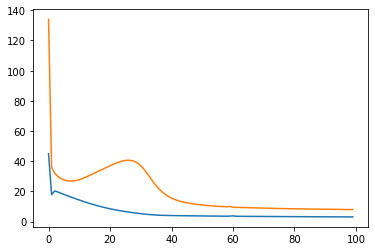

In [25]:
plt.plot(train_loss)
plt.plot(val_loss)

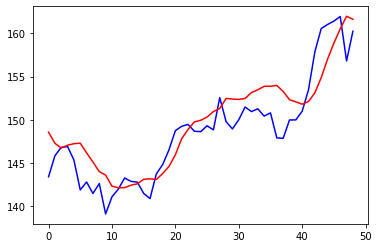

In [26]:
plt.plot(y_test,color='blue')
y_pred = nn_model(test_tensor.float())
plt.plot(y_pred.detach().numpy(),color='red')

ARIMA

In [27]:
# https://towardsdatascience.com/time-series-forecasting-predicting-stock-prices-using-an-arima-model-2e3b3080bd70


In [28]:
# Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA, sarimax
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt

from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn import linear_model

import pmdarima as pm
from pmdarima.model_selection import train_test_split

# from fbprophet import Prophet

from pandas import to_datetime

import itertools
import warnings

import datetime
from datetime import datetime

new_aapl_dataset.head()
arima_dataset = pd.DataFrame()
arima_dataset['Close'] = new_aapl_dataset['Close']
arima_dataset.index = new_aapl_dataset.index
arima_dataset.head()
# ETS Decomposition
# result = seasonal_decompose(arima_dataset['Close'], model ='multiplicative')

# ETS plot
# result.plot()



,Close
Date,
2010-03-30,8.423214
2010-03-31,8.392857
2010-04-01,8.427500
2010-04-05,8.517500
2010-04-06,8.555000


In [29]:
X_train = arima_dataset['Close'][:-100]
X_test  = arima_dataset['Close'][-100:]



In [30]:
# https://www.analyticsvidhya.com/blog/2020/10/how-to-create-an-arima-model-for-time-series-forecasting-in-python/
from statsmodels.tsa.stattools import adfuller

def adfuller_test(dataset):
    result=adfuller(dataset)
    labels = ['ADF Test Statistic','p-value','#Lags Used','Number of Observations']
    for value,label in zip(result,labels):
        print(label+' : '+str(value) )

    if result[1] <= 0.05:
        print("strong evidence against the null hypothesis(Ho), reject the null hypothesis. Data is stationary")
    else:
        print("weak evidence against null hypothesis,indicating it is non-stationary ")

test_result=adfuller_test(arima_dataset['Close'])


ADF Test Statistic : 3.0027548579498258
p-value : 1.0
#Lags Used : 27
Number of Observations : 2912
weak evidence against null hypothesis,indicating it is non-stationary 


In [31]:
# df['Sales First Difference'] = df['Sales'] - df['Sales'].shift(1)
# df['Seasonal First Difference']=df['Sales']-df['Sales'].shift(12)
# df.head()
arima_dataset['Difference']

KeyError: 'Difference'

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from pmdarima.arima.utils import ndiffs

ndiffs(arima_dataset['Close'],test='adf') # Obtains value of 'd'

# plt.plot(arima_dataset['Close'].diff().dropna())
# plot_acf(arima_dataset['Close'].diff().dropna())

In [ ]:
# To find value of p

from statsmodels.graphics.tsaplots import plot_pacf

diff_arima = arima_dataset['Close'].diff().dropna()

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff_arima)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_pacf(diff_arima, ax=ax2);

# p = 1 or 7

In [ ]:
from pandas.plotting import autocorrelation_plot

autocorrelation_plot(arima_dataset['Close'].dropna())
plt.show()

In [ ]:
# diff = df.close.diff().dropna()
# To find Q
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4))

ax1.plot(diff_arima)
ax1.set_title("Difference once")
ax2.set_ylim(0, 1)
plot_acf(diff_arima, ax=ax2);

# q = 1


In [ ]:
train_data, test_data = arima_dataset[0:int(len(arima_dataset)*0.8)], arima_dataset[int(len(arima_dataset)*0.8):]
training_data = train_data['Close'].values
test_data = test_data['Close'].values
# history = [x for x in training_data]
# model_predictions = []
# N_test_observations = len(test_data)
# for time_point in range(N_test_observations):
#     model = ARIMA(history, order=(7,1,1))
#     model_fit = model.fit()
#     output = model_fit.forecast()
#     yhat = output[0]
#     model_predictions.append(yhat)
#     true_test_value = test_data[time_point]
#     history.append(true_test_value)
# MSE_error = mean_squared_error(test_data, model_predictions)
# print('Testing Mean Squared Error is {}'.format(MSE_error))

model = ARIMA(train_data,order=(7,1,1))
# model = sarimax(train_data,order=(7,1,1))
model_fit = model.fit()

In [ ]:
print(model_fit.summary())

In [ ]:
testing = arima_dataset[int(len(arima_dataset)*0.8):]
testing['Date'] = arima_dataset.index[int(len(arima_dataset)*0.8):]
start_date = '2019-08-02'
end_date = '2021-11-30'
# testing.iloc[:,1]
forecast = model_fit.predict(start =start_date, end= end_date)

In [ ]:
test_set_range = arima_dataset[int(len(arima_dataset)*0.7):].index
plt.plot(test_set_range, model_predictions, color='blue', linestyle='dashed',label='Predicted Price')
plt.plot(test_set_range, test_data, color='red', label='Actual Price')
plt.title('AAPL Prices Prediction')
plt.xlabel('Date')
plt.ylabel('Prices')
# plt.xticks(np.arange(881,1259,50), arima_dataset.Date[881:1259:50])
plt.legend()
plt.show()

LSTM

In [ ]:
temp_dataset = pd.DataFrame()
temp_dataset = new_aapl_dataset['Close']
close_dataset = temp_dataset.reset_index()['Close']
close_dataset.head()
plt.plot(close_dataset)

In [ ]:
from sklearn.preprocessing import MinMaxScaler
minmax = MinMaxScaler(feature_range=(0,1))
close_dataset = minmax.fit_transform(np.array(close_dataset).reshape(-1,1))
print(close_dataset.dtype)
plt.plot(close_dataset)
print(len(close_dataset))



In [ ]:
training_size=int(len(close_dataset)*0.90)
test_size=len(close_dataset)-training_size
train_data,test_data=close_dataset[0:training_size,:],close_dataset[training_size:len(close_dataset),:]
print(training_size,test_size)
print(len(close_dataset))

In [ ]:
# convert an array of values into a dataset matrix

def create_dataset(in_data, days=1):
    X=[]
    Y=[]
    for i in range(len(in_data)-days-1):
        temp_X = in_data[i:i+days,0]
        temp_Y = in_data[i+days,0]

        X.append(temp_X)
        Y.append(temp_Y)
    return np.array(X), np.array(Y).reshape((-1,1))

In [ ]:
time_interval = 50
X_train, y_train = create_dataset(train_data,time_interval)
X_test, y_test = create_dataset(test_data,time_interval)
# print(y_train.shape)
# print(np.hstack((X_train[:10,-5:],y_train[:10])))
print(y_test.shape)

In [ ]:
# reshape input to be [samples, time steps, features] which is required for LSTM
X_train =X_train.reshape(X_train.shape[0],X_train.shape[1] , 1)
X_test = X_test.reshape(X_test.shape[0],X_test.shape[1] , 1)

In [ ]:
### Create the Stacked LSTM model
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
from tensorflow.keras.layers import Dropout

In [ ]:
model=Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(50,1)))
# model.add(Dropout(0.2))
model.add(LSTM(50,return_sequences=True))
# model.add(Dropout(0.2))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss='mean_squared_error',optimizer='adam')
model.summary()


In [ ]:
model.reset_states()
model.reset_metrics()

In [ ]:
history = model.fit(X_train,y_train,validation_data=(X_test,y_test),epochs=100,batch_size=64,verbose=1)

In [ ]:
y_test_pred = model.predict(X_test)
print(y_test_pred.shape)
y_test_pred = minmax.inverse_transform(y_test_pred.reshape((y_test_pred.shape[0],y_test_pred.shape[1])))

plt.plot(minmax.inverse_transform(y_test),label='Actual')
plt.plot(y_test_pred,label = 'Prediction')
plt.legend()

In [ ]:
y_train_pred = model.predict(X_train)
y_train_pred = minmax.inverse_transform(y_train_pred)

plt.plot(minmax.inverse_transform(y_train),label='Actual')
plt.plot(y_train_pred,label = 'Prediction')
plt.legend()

In [ ]:
# print(np.hstack((minmax.inverse_transform(y_test),y_test_pred)))
# history = model.fit(X, Y, epochs=100, validation_data=(valX, valY))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [ ]:
import math
math.sqrt(mean_squared_error(y_test,y_test_pred))